In [1]:
!pip install ultralytics
!pip install -U ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 21.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 60.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [2]:
import os
import random

from ultralytics import YOLO
import cv2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [3]:
train_images = "/kaggle/input/vehicles-dataset/yolov8_dataset/train/images"
train_labels = "/kaggle/input/vehicles-dataset/yolov8_dataset/train/labels"

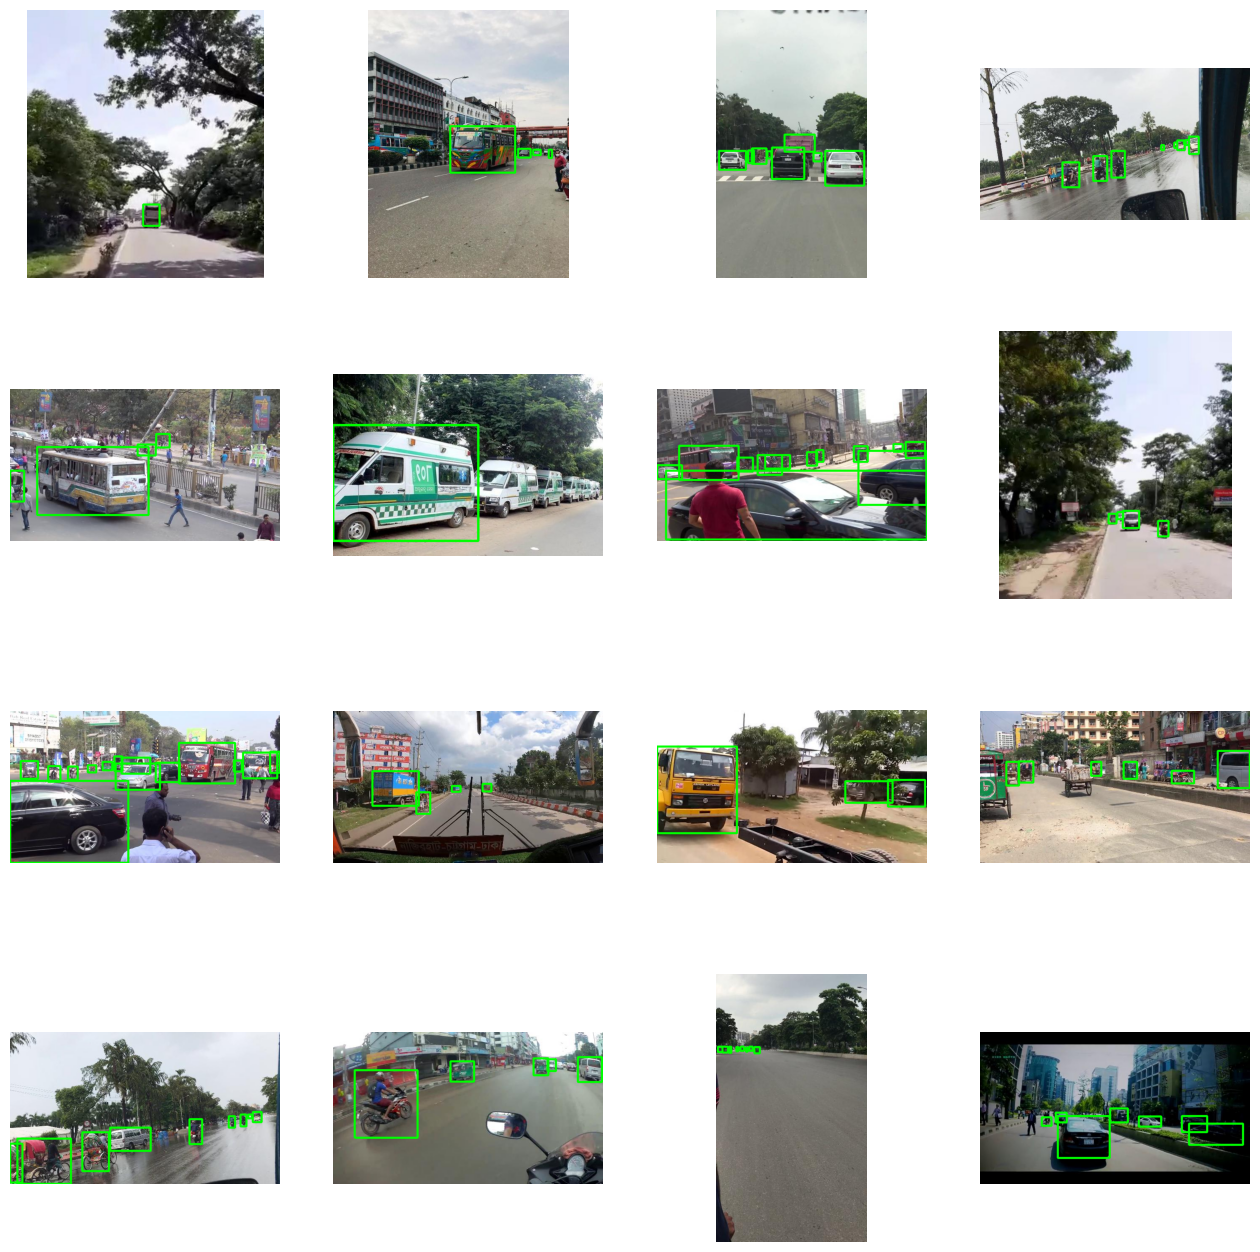

In [4]:
def load_labels(image_file, train_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")
    
    return labels

def plot_object_detections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')


# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    labels = load_labels(image_file, train_labels)

    # Plot object detections
    plot_object_detections(axs[row, col], image, labels)

plt.show()

In [5]:
with open('/kaggle/input/vehicles-dataset/yolov8_dataset/data_1.yaml', 'r') as f:
    
    data = f.read()
    
print(data)

train: ../train/images
val: ../valid/images

nc: 21
names: ['emergency vehicle', 'army vehicle', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup','policecar' ,'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers -CNG-', 'truck', 'van', 'wheelbarrow']


In [6]:
h, w, c = image.shape

print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x359 and 3 channels.


In [7]:
pip install --upgrade ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 MB 17.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.9.0
    Uninstalling ray-2.9.0:
      Successfully uninstalled ray-2.9.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
model = YOLO('yolov8x.pt')

model.train(data = '/kaggle/input/vehicles-dataset/yolov8_dataset/data_1.yaml',
            epochs = 30,
            imgsz = h,
            seed = 42,
            batch = 8,
            workers = 4)

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/vehicles-dataset/yolov8_dataset/data_1.yaml, epochs=30, time=None, patience=100, batch=8, imgsz=359, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /kaggle/input/vehicles-dataset/yolov8_dataset/train/labels... 2818 images, 7 backgrounds, 0 corrupt: 100%|██████████| 2823/2823 [00:03<00:00, 722.79it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/vehicles-dataset/yolov8_dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/vehicles-dataset/yolov8_dataset/valid/labels... 343 images, 1 backgrounds, 0 corrupt: 100%|██████████| 343/343 [00:00<00:00, 660.70it/s]

val: WARNING ⚠️ /kaggle/input/vehicles-dataset/yolov8_dataset/valid/images/Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
val: WARNING ⚠️ /kaggle/input/vehicles-dataset/yolov8_dataset/valid/images/Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed


val: WARNING ⚠️ Cache directory /kaggle/input/vehicles-dataset/yolov8_dataset/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 384 train, 384 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.13G      1.284      1.839       1.11        127        384: 100%|██████████| 353/353 [01:37<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.18it/s]

                   all        343       2610      0.505      0.241      0.225       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.43G      1.345      1.514      1.158         82        384: 100%|██████████| 353/353 [01:30<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.31it/s]

                   all        343       2610      0.571      0.294      0.277      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.43G      1.358      1.478      1.159        120        384: 100%|██████████| 353/353 [01:29<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.30it/s]

                   all        343       2610       0.57      0.316      0.319      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.42G      1.348      1.448      1.166        207        384: 100%|██████████| 353/353 [01:28<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.27it/s]

                   all        343       2610       0.61      0.326       0.33      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.24G      1.337       1.38      1.154         75        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.20it/s]

                   all        343       2610      0.638      0.338      0.349      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.43G      1.284      1.291      1.134        171        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.23it/s]

                   all        343       2610       0.59      0.343      0.364      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.42G      1.265      1.228      1.121         44        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.29it/s]

                   all        343       2610        0.6      0.385      0.378      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.45G      1.257       1.19      1.116         74        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.29it/s]

                   all        343       2610      0.597      0.401      0.403      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.43G      1.226      1.156      1.105         85        384: 100%|██████████| 353/353 [01:28<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.19it/s]

                   all        343       2610      0.524      0.402      0.392      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.45G      1.206       1.11      1.092         73        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.17it/s]

                   all        343       2610      0.681      0.385      0.412      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.44G      1.186       1.08      1.083         67        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.24it/s]

                   all        343       2610       0.55      0.419      0.419      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.45G      1.165      1.033      1.071         80        384: 100%|██████████| 353/353 [01:28<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.24it/s]

                   all        343       2610       0.63       0.38      0.396       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.17G      1.153       1.01      1.065         65        384: 100%|██████████| 353/353 [01:28<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.32it/s]

                   all        343       2610      0.597      0.418       0.43      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.42G      1.126     0.9689       1.06         91        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.26it/s]

                   all        343       2610      0.659      0.447      0.443      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.43G      1.121     0.9376      1.055        168        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.32it/s]

                   all        343       2610      0.608      0.424       0.44      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.48G      1.101     0.9132      1.044         67        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.28it/s]

                   all        343       2610      0.732      0.417      0.458      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.43G      1.086     0.8894      1.038         60        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.36it/s]

                   all        343       2610      0.556      0.439      0.442      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.43G       1.07      0.859      1.031        120        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.33it/s]

                   all        343       2610      0.517      0.479      0.451      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.45G      1.049     0.8363      1.016        143        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.19it/s]

                   all        343       2610      0.581      0.436      0.477      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.43G      1.045     0.8185      1.019         56        384: 100%|██████████| 353/353 [01:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.34it/s]

                   all        343       2610      0.618      0.457      0.475      0.303


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.17G      1.028      0.749      1.001         41        384: 100%|██████████| 353/353 [01:29<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.19it/s]

                   all        343       2610      0.562       0.47       0.48        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.45G      1.016     0.7243     0.9979         32        384: 100%|██████████| 353/353 [01:28<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.33it/s]

                   all        343       2610      0.645      0.457      0.458      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.42G      1.001     0.7098     0.9825         42        384: 100%|██████████| 353/353 [01:28<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.32it/s]

                   all        343       2610      0.586      0.476      0.468      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.43G     0.9823     0.6817     0.9762         51        384: 100%|██████████| 353/353 [01:28<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.30it/s]

                   all        343       2610      0.622      0.484      0.512      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.43G      0.964     0.6612     0.9714         38        384: 100%|██████████| 353/353 [01:28<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.34it/s]

                   all        343       2610      0.748      0.416      0.479      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.44G     0.9546     0.6359     0.9606         46        384: 100%|██████████| 353/353 [01:28<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.32it/s]

                   all        343       2610      0.578      0.468      0.494      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.48G     0.9379     0.6134     0.9636         51        384: 100%|██████████| 353/353 [01:28<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.33it/s]

                   all        343       2610      0.622       0.44      0.487      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.44G     0.9221     0.5954     0.9521        142        384: 100%|██████████| 353/353 [01:28<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.19it/s]

                   all        343       2610      0.588      0.481      0.487      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.16G      0.908     0.5808     0.9398         63        384: 100%|██████████| 353/353 [01:28<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.31it/s]

                   all        343       2610      0.592      0.469      0.497       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.42G     0.8942      0.563     0.9412         40        384: 100%|██████████| 353/353 [01:28<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.35it/s]

                   all        343       2610      0.577       0.48      0.501      0.321



30 epochs completed in 0.796 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 136.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68143791 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.41it/s]


                   all        343       2610      0.618      0.486      0.512      0.321
     emergency vehicle         42         42      0.862          1      0.975       0.83
               bicycle         30         32      0.414      0.441      0.378      0.165
                   bus        220        425      0.805      0.588       0.69      0.445
                   car        232        842      0.803      0.717      0.798      0.533
               minibus          2          2      0.219        0.5      0.512       0.41
               minivan         87        110      0.417      0.509      0.401      0.286
             motorbike        166        335      0.568        0.6      0.557      0.205
                pickup        105        142      0.573      0.261      0.379      0.239
             policecar          1          1          1          0          0          0
              rickshaw         62        192      0.599      0.719      0.703      0.475
               scoote

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f88c7be7e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.04

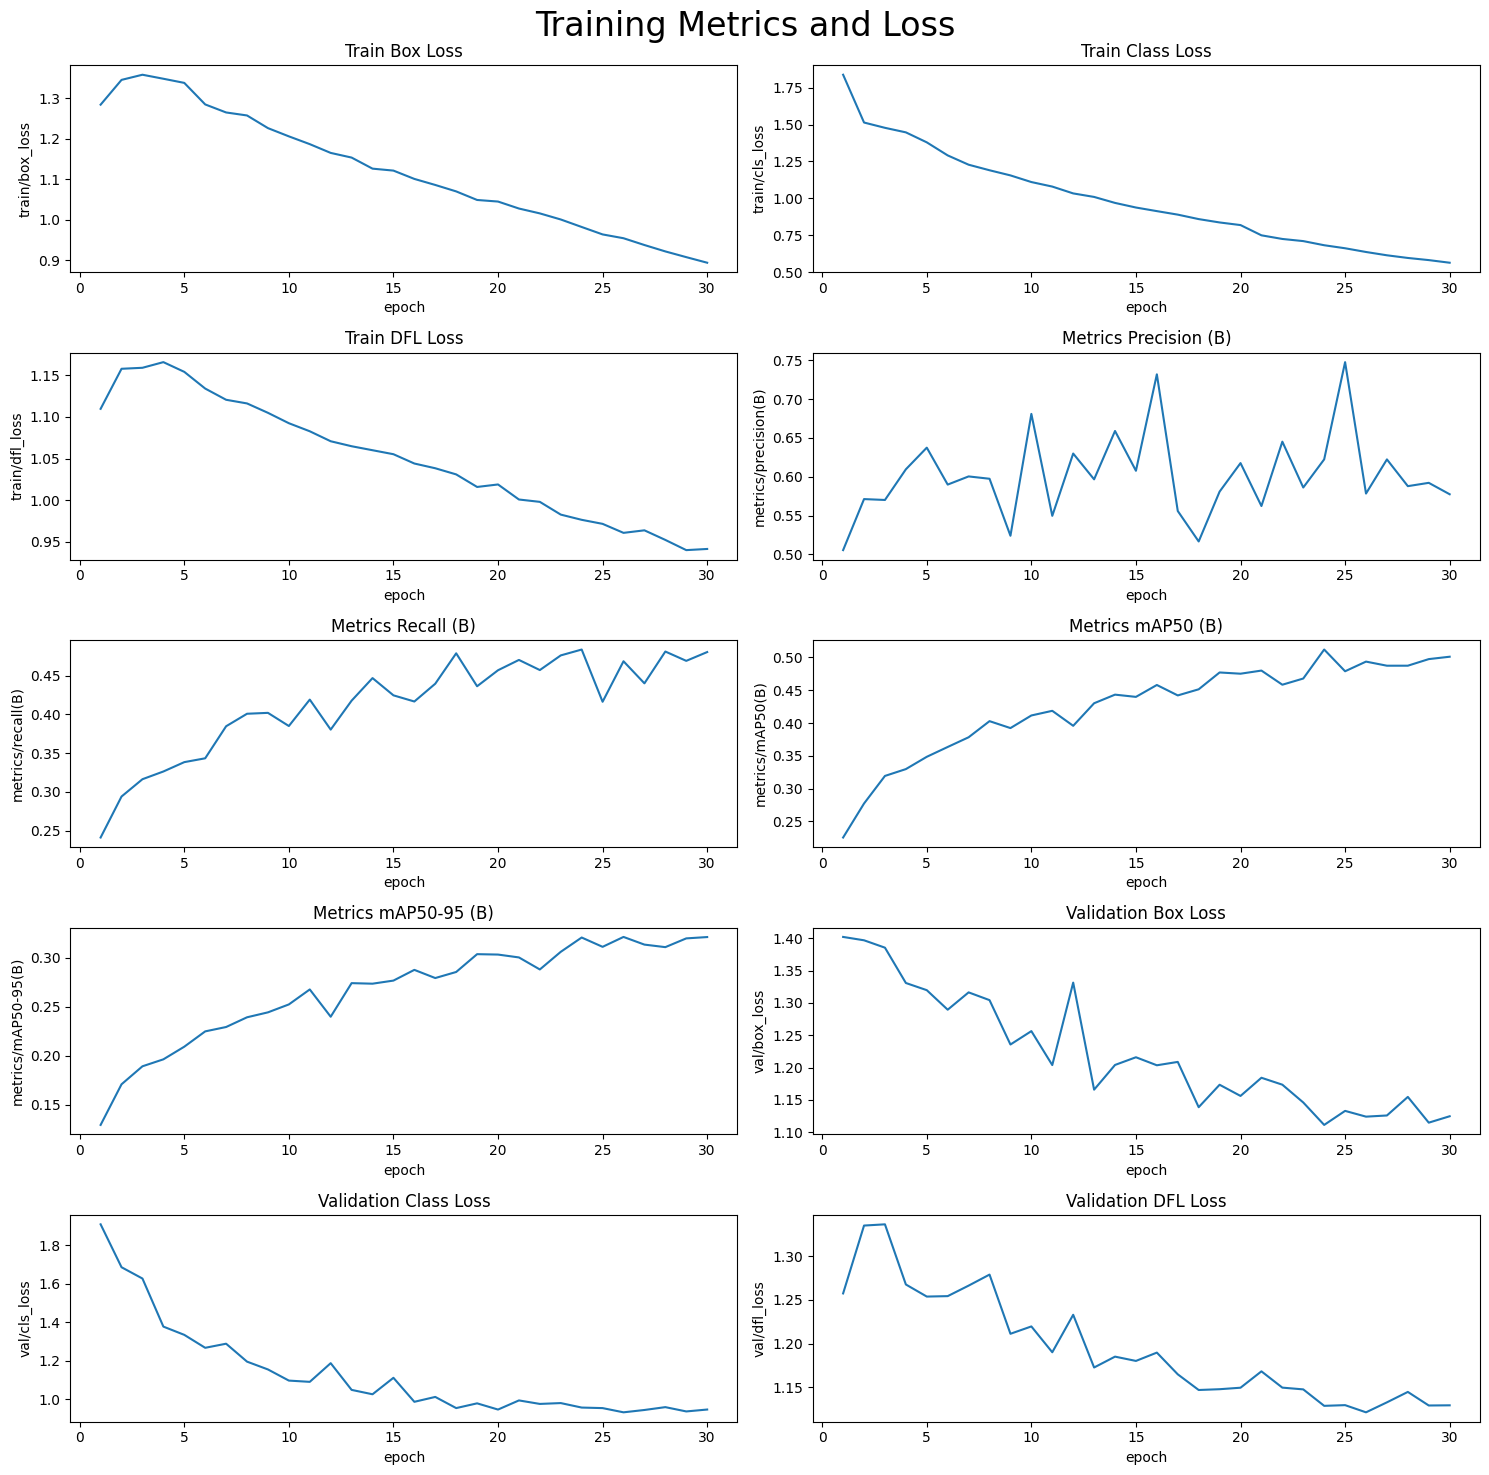

In [10]:
df = pd.read_csv('/kaggle/working/runs/detect/train2/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

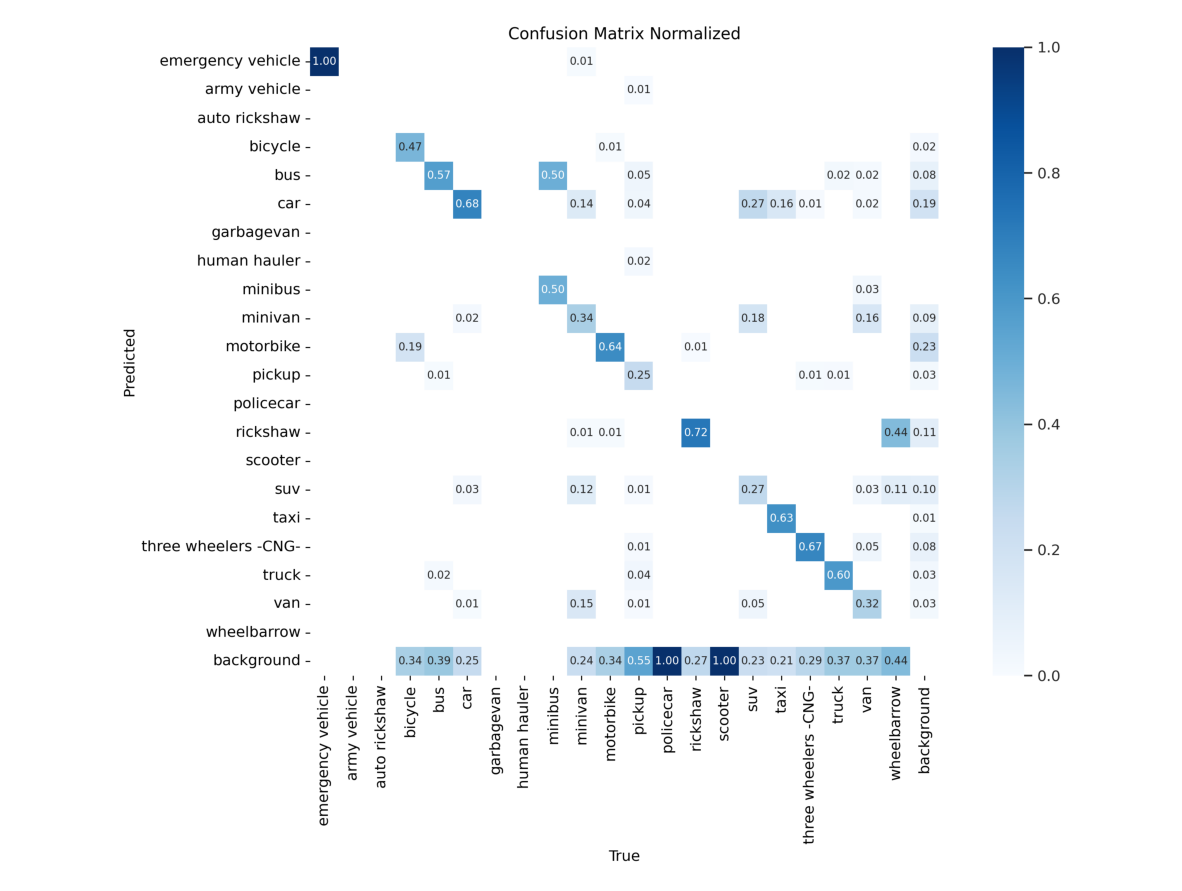

In [11]:
img = mpimg.imread('/kaggle/working/runs/detect/train2/confusion_matrix_normalized.png')

fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');


0: 224x384 1 bus, 1 motorbike, 1 three wheelers -CNG-, 93.2ms
Speed: 2.4ms preprocess, 93.2ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 384)

0: 224x384 1 bicycle, 1 bus, 4 cars, 1 motorbike, 1 suv, 1 three wheelers -CNG-, 1 van, 30.4ms
Speed: 0.9ms preprocess, 30.4ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 384)

0: 224x384 1 bus, 4 cars, 1 motorbike, 1 rickshaw, 30.4ms
Speed: 1.2ms preprocess, 30.4ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 384)

0: 224x384 2 buss, 30.4ms
Speed: 0.8ms preprocess, 30.4ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 384)

0: 224x384 1 emergency vehicle, 1 bus, 2 cars, 1 motorbike, 2 suvs, 1 van, 22.7ms
Speed: 0.8ms preprocess, 22.7ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 384)

0: 224x384 2 buss, 6 cars, 3 rickshaws, 22.7ms
Speed: 0.8ms preprocess, 22.7ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 384)

0: 224x384 2 trucks, 24.3ms
Speed: 0.9ms 

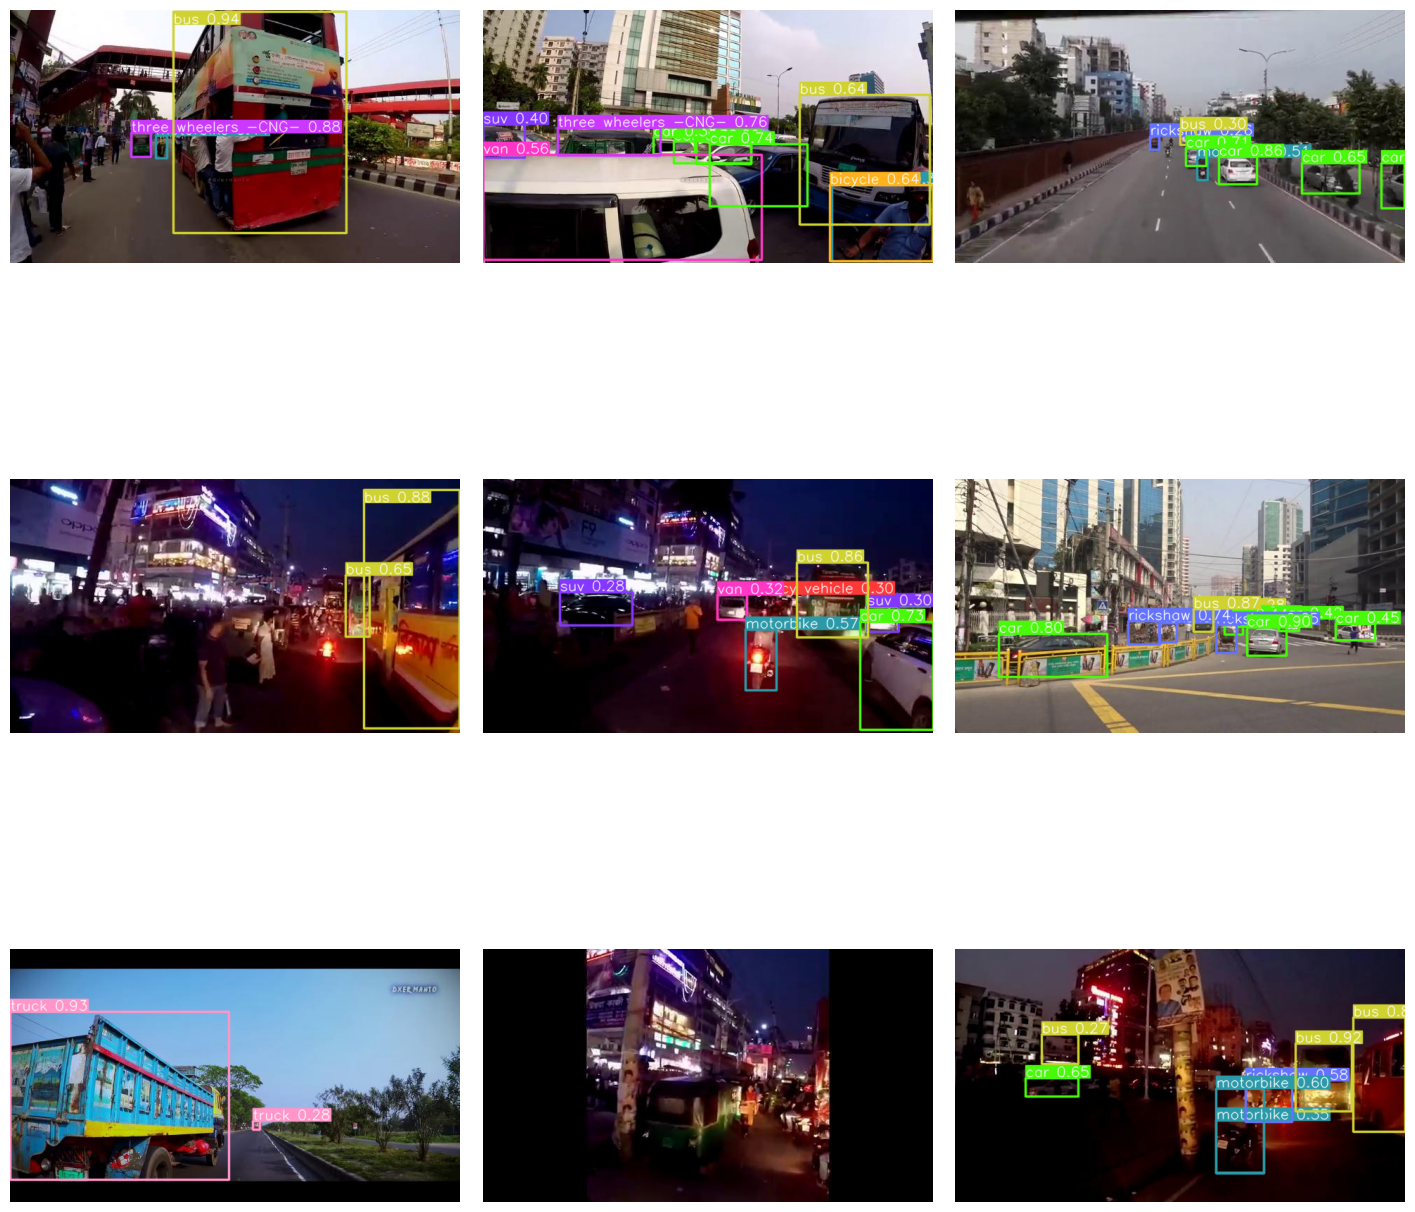

In [12]:
def detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img

custom_image_dir = '/kaggle/input/vehicles-dataset/yolov8_dataset/valid/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 9)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 3
    col_idx = i % 3
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [13]:
model.save('custom_trained_model.pt')

In [14]:
def predict(path):
    result_predict = model.predict(path)

    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(plot))


image 1/1 /kaggle/input/model-test/test.jpg: 352x384 1 emergency vehicle, 84.1ms
Speed: 1.1ms preprocess, 84.1ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 384)


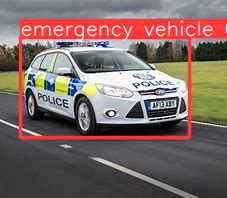


image 1/1 /kaggle/input/model-test/test2.jpg: 352x384 1 emergency vehicle, 44.2ms
Speed: 1.3ms preprocess, 44.2ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 384)


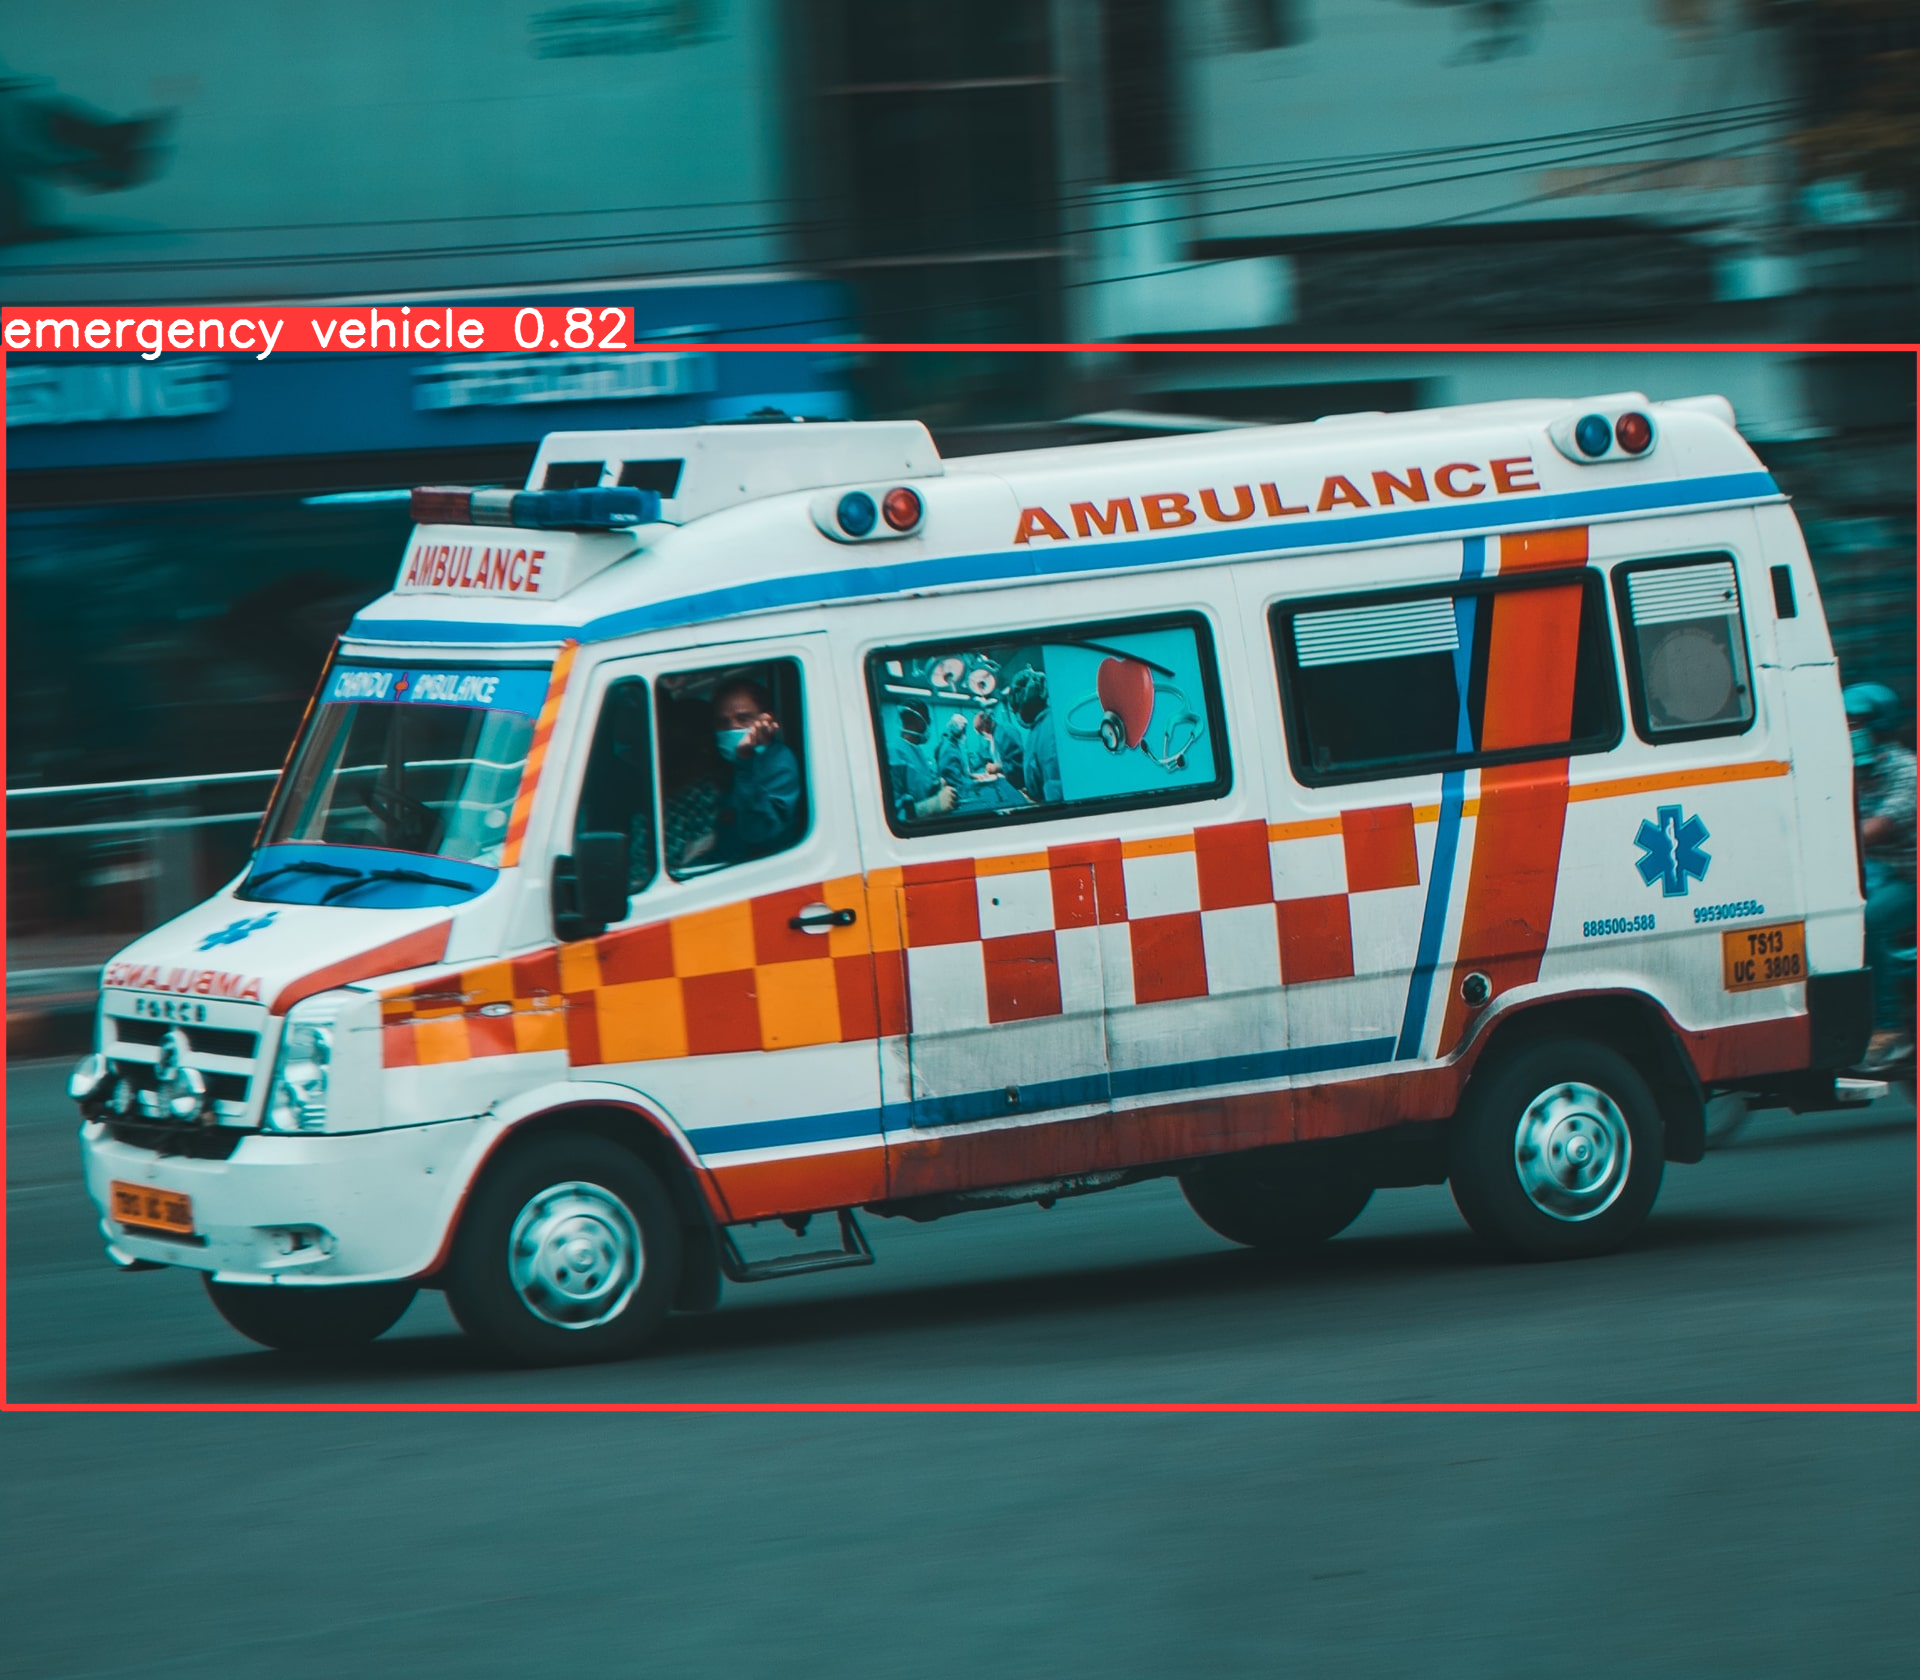


image 1/1 /kaggle/input/model-test/test4.png: 320x384 2 emergency vehicles, 1 van, 84.5ms
Speed: 1.3ms preprocess, 84.5ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 384)


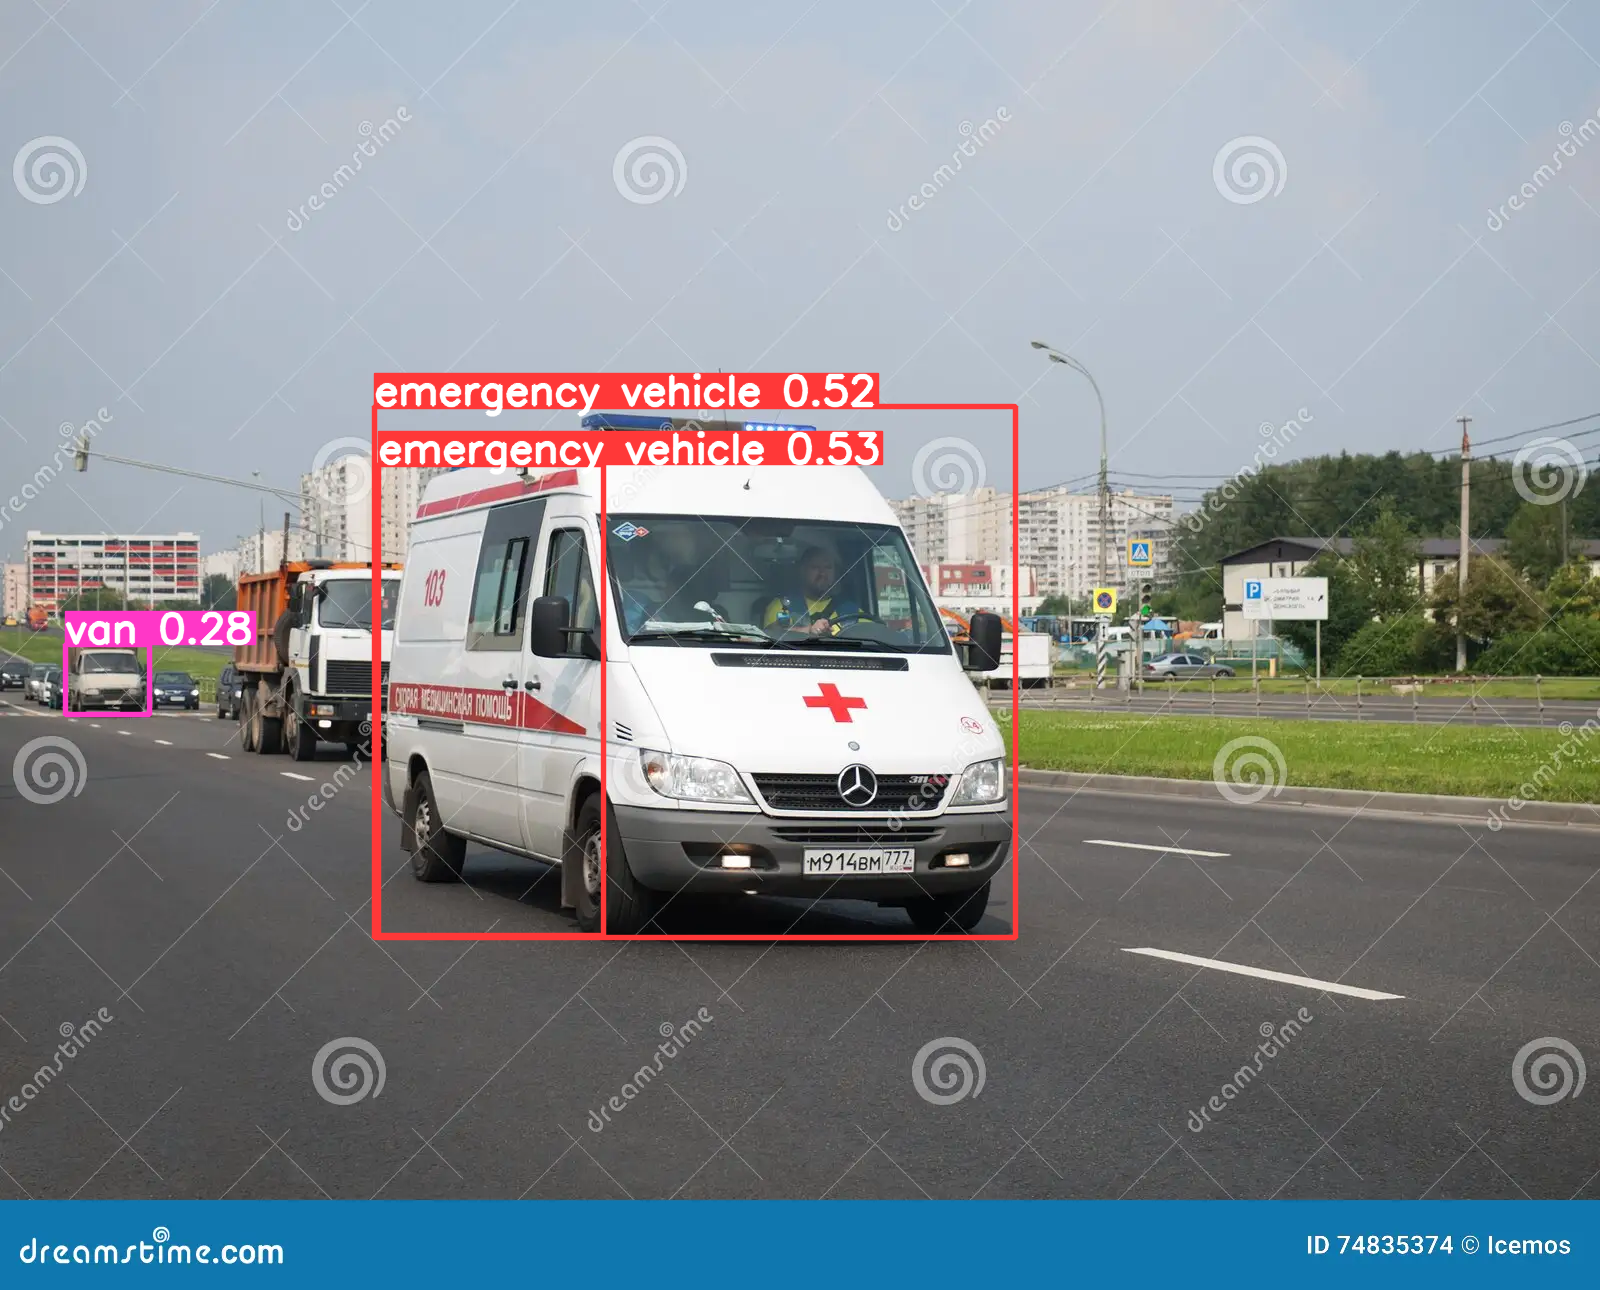

In [15]:
predict("/kaggle/input/model-test/test.jpg")
predict("/kaggle/input/model-test/test2.jpg")
predict("/kaggle/input/model-test/test4.png")